#Reasoning models
Made by: Wilfredo Aaron Sosa Ramos

##1. GPT o1-mini

In [1]:
!pip install -q openai

In [2]:
from google.colab import userdata
import os


def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = userdata.get(var)


_set_env("OPENAI_API_KEY")

In [6]:
from pydantic import BaseModel, Field, validator
from typing import Optional, List, Union
from datetime import datetime
from openai import OpenAI

client = OpenAI()

class ContextInfo(BaseModel):
    field: str = Field(..., description="The field of the answer: 'Statistics', 'Integral Calculus', or 'Theory of Curricular Design'.")
    subfield: Optional[str] = Field(None, description="The specific subfield, if applicable (e.g., 'Bayesian Analysis', 'Definite Integrals', 'Constructivist Curriculum Theory').")

class QuestionDetails(BaseModel):
    question: str = Field(..., description="The question or problem being answered.")
    keywords: List[str] = Field(..., description="Keywords to clarify or focus the answer.")
    context: str = Field(..., description="Additional context or background for the answer (e.g., prior knowledge, assumptions, or constraints).")

class AnswerPreferences(BaseModel):
    depth: str = Field(..., description="The depth of the answer provided: 'summary', 'detailed', or 'step-by-step'.")
    format: str = Field(..., description="The format of the answer: 'text', 'equations', 'visualizations', or 'code'.")

class UserProfile(BaseModel):
    academic_level: str = Field(..., description="The user's academic level: 'high school', 'undergraduate', 'graduate', or 'professional'.")
    familiarity_with_topic: str = Field(..., description="The user's familiarity with the topic: 'beginner', 'intermediate', or 'advanced'.")
    preferred_language: str = Field(..., description="The user's preferred language for the answer.")

class Metadata(BaseModel):
    timestamp: str = Field(..., description="The timestamp when the answer is provided.")  # Remove format from here
    question_id: Optional[str] = Field(None, description="Optional unique identifier for the question.")
    generated_by: str = Field(..., description="The source or generator of the answer.")

class StatisticsDetails(BaseModel):
    data_provided: Optional[List[float]] = Field(None, description="Optional dataset referenced in the answer.")
    statistical_methods: Optional[List[str]] = Field(None, description="Statistical methods used or discussed in the answer (e.g., 'regression', 'ANOVA').")
    interpretation: Optional[str] = Field(None, description="Interpretation of results or insights derived from the statistical analysis.")

class IntegralCalculusDetails(BaseModel):
    function: Optional[str] = Field(None, description="The mathematical function used or referenced in the answer.")
    bounds: Optional[List[float]] = Field(None, description="The integration bounds discussed in the answer.")
    methods_of_interest: Optional[List[str]] = Field(None, description="Methods referenced in the answer (e.g., 'substitution', 'partial fractions').")
    solution_steps: Optional[List[str]] = Field(None, description="Step-by-step solution details for solving the integral.")

class CurricularDesignDetails(BaseModel):
    curriculum_type: Optional[str] = Field(None, description="The type of curriculum discussed in the answer (e.g., 'outcomes-based', 'spiral curriculum').")
    target_audience: Optional[str] = Field(None, description="The audience for the curriculum discussed in the answer (e.g., 'high school students', 'adult learners').")
    objectives: Optional[List[str]] = Field(None, description="Specific learning objectives or goals discussed in the answer.")
    design_principles: Optional[List[str]] = Field(None, description="Key principles or theories influencing the curriculum design.")

class AnswerDetails(BaseModel):
    content: Union[str, List[str]] = Field(..., description="The main content of the answer, which could be text, steps, or structured information.")
    supplementary_materials: Optional[List[str]] = Field(None, description="Links, resources, or references supporting the answer.")

class AnswerSchema(BaseModel):
    context_info: ContextInfo
    question_details: QuestionDetails
    answer_preferences: AnswerPreferences
    user_profile: UserProfile
    metadata: Metadata
    statistics_details: Optional[StatisticsDetails] = Field(None, description="Details specific to statistics-related answers.")
    integral_calculus_details: Optional[IntegralCalculusDetails] = Field(None, description="Details specific to integral calculus-related answers.")
    curricular_design_details: Optional[CurricularDesignDetails] = Field(None, description="Details specific to curricular design-related answers.")
    answer_details: AnswerDetails = Field(..., description="The main answer content and related materials.")

    @validator("context_info")
    def validate_field(cls, value):
        allowed_fields = ["Statistics", "Integral Calculus", "Theory of Curricular Design"]
        if value.field not in allowed_fields:
            raise ValueError(f"Field must be one of {allowed_fields}.")
        return value

completion = client.beta.chat.completions.parse(
    model="o1-2024-12-17",
    messages=[
        {
            "role": "system",
            "content": (
                "You are a specialized assistant capable of solving complex problems in "
                "Statistics, Integral Calculus, and Theory of Curricular Design. Use "
                "Chain-of-Thought (CoT) reasoning to ensure detailed, step-by-step answers."
            ),
        },
        {
            "role": "user",
            "content": (
                "Solve the differential equation dy/dx = y^2 + x^2 for y as a function of x, "
                "and provide a detailed solution explaining each step."
            ),
        },
    ],
    response_format=AnswerSchema,
)

event = completion.choices[0].message.parsed

<ipython-input-6-eda32651a308>:63: PydanticDeprecatedSince20: Pydantic V1 style `@validator` validators are deprecated. You should migrate to Pydantic V2 style `@field_validator` validators, see the migration guide for more details. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/
  @validator("context_info")


In [8]:
dict(event)

{'context_info': ContextInfo(field='Integral Calculus', subfield=None),
 'question_details': QuestionDetails(question='Solve the differential equation dy/dx = y^2 + x^2 for y as a function of x, and provide a detailed solution explaining each step.', keywords=[], context=''),
 'answer_preferences': AnswerPreferences(depth='step-by-step', format='json'),
 'user_profile': UserProfile(academic_level='undergraduate', familiarity_with_topic='intermediate', preferred_language='English'),
 'metadata': Metadata(timestamp='2023-10-07T12:00:00Z', question_id=None, generated_by='Assistant'),
 'statistics_details': None,
 'integral_calculus_details': None,
 'curricular_design_details': None,
 'answer_details': AnswerDetails(content=['Below is a detailed, step-by-step derivation showing that this first-order nonlinear differential equation does not admit a closed-form solution in elementary functions, but can be solved in terms of special functions via a standard Riccati-equation transformation.', 

In [9]:
completion = client.beta.chat.completions.parse(
    model="o1-2024-12-17",
    messages=[
        {
            "role": "system",
            "content": (
                "You are a specialized assistant capable of solving complex problems in "
                "Statistics, Integral Calculus, and Theory of Curricular Design. Use "
                "Chain-of-Thought (CoT) reasoning to ensure detailed, step-by-step answers."
            ),
        },
        {
            "role": "user",
            "content": (
                """
                Solve
                \[
                \frac{dy}{dx} = e^{2x}(1 + y^2)
                \]
                given that when \(x = 0\), \(y = 1\).

                Express \(y\) in terms of \(x\).
                """
            ),
        },
    ],
    response_format=AnswerSchema,
)

event = completion.choices[0].message.parsed

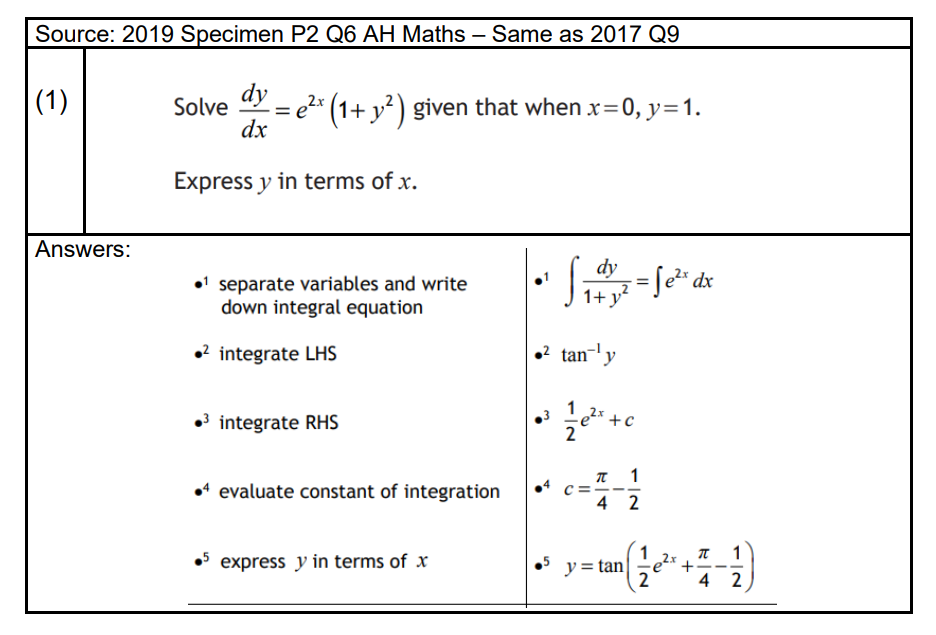

In [11]:
dict(event)

{'context_info': ContextInfo(field='Integral Calculus', subfield=None),
 'question_details': QuestionDetails(question='Solve  dy/dx = e^(2x)(1 + y^2)  given that when x = 0, y = 1. Express y in terms of x.', keywords=[], context=''),
 'answer_preferences': AnswerPreferences(depth='step-by-step', format='none'),
 'user_profile': UserProfile(academic_level='undergraduate', familiarity_with_topic='intermediate', preferred_language='English'),
 'metadata': Metadata(timestamp='2023-10-07 00:00:00', question_id=None, generated_by='ChatGPT'),
 'statistics_details': None,
 'integral_calculus_details': IntegralCalculusDetails(function=None, bounds=None, methods_of_interest=['Separable differential equation'], solution_steps=['1. Rewrite the differential equation in separable form: dy/(1+y^2) = e^(2x) dx.', '2. Integrate both sides: ∫[1/(1+y^2)] dy = ∫ e^(2x) dx.', '3. Recognize that ∫ 1/(1+y^2) dy = arctan(y) + C1 and ∫ e^(2x) dx = (1/2)e^(2x) + C2.', '4. Combine constants: arctan(y) = (1/2)e^(

In [12]:
completion = client.beta.chat.completions.parse(
    model="o1-2024-12-17",
    messages=[
        {
            "role": "system",
            "content": (
                "You are a specialized assistant capable of solving complex problems in "
                "Statistics, Integral Calculus, and Theory of Curricular Design. Use "
                "Chain-of-Thought (CoT) reasoning to ensure detailed, step-by-step answers."
            ),
        },
        {
            "role": "user",
            "content": (
                """
                Resuelve
                \[
                \frac{dy}{dx} = e^{2x}(1 + y^2)
                \]
                dado que cuando \(x = 0\), \(y = 1\).

                Expresa \(y\) en términos de \(x\).
                Bríndame la respuesta en español.
                """
            ),
        },
    ],
    response_format=AnswerSchema,
)

event = completion.choices[0].message.parsed

In [15]:
dict(event)

{'context_info': ContextInfo(field='Integral Calculus', subfield=None),
 'question_details': QuestionDetails(question='Resuelve la ecuación diferencial (dy/dx) = e^(2x)(1 + y^2) con la condición y(0)=1.', keywords=['ecuación diferencial', 'ayuda'], context=''),
 'answer_preferences': AnswerPreferences(depth='step-by-step', format='jsonconnect to gpt-4'),
 'user_profile': UserProfile(academic_level='undergraduate', familiarity_with_topic='intermediate', preferred_language='Spanish'),
 'metadata': Metadata(timestamp='2023-10-07T12:00:00Z', question_id=None, generated_by='assistant'),
 'statistics_details': None,
 'integral_calculus_details': IntegralCalculusDetails(function=None, bounds=None, methods_of_interest=['separation of variables', 'integration'], solution_steps=['1. Comienza con la ecuación diferencial (dy/dx) = e^(2x)(1 + y^2).', '2. Reorganiza la ecuación para separar las variables: dy/(1 + y^2) = e^(2x) dx.', '3. Integra ambos lados: ∫ [1/(1 + y^2)] dy = ∫ e^(2x) dx.', '4. La

##2. Gemini 2.0 flash exp thinking:

In [13]:
!pip install google-genai

In [14]:
from google.colab import userdata
import os


def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = userdata.get(var)


_set_env("GEMINI_API_KEY")

In [16]:
%%time
from google import genai
from langchain_core.output_parsers import JsonOutputParser

parser = JsonOutputParser(pydantic_object=AnswerSchema)

client = genai.Client(api_key=userdata.get("GEMINI_API_KEY"), http_options={'api_version': 'v1alpha'})

question = """
Resuelve
\[
\frac{dy}{dx} = e^{2x}(1 + y^2)
\]
dado que cuando \(x = 0\), \(y = 1\).

Expresa \(y\) en términos de \(x\).
Bríndame la respuesta en español.
"""

response = client.models.generate_content(
    model='gemini-2.0-flash-thinking-exp', contents=f"""
    You are a specialized assistant capable of solving complex problems in Statistics, Integral Calculus, and
    Theory of Curricular Design. Use Chain-of-Thought (CoT) reasoning to ensure detailed, step-by-step answers.

    {question}

    You must return the response in this JSON format:
    {parser.get_format_instructions()}
    """
)

CPU times: user 1.96 s, sys: 187 ms, total: 2.15 s
Wall time: 9.6 s


In [21]:
result = None
for part in response.candidates[0].content.parts:
    if part.thought == True:
        print(f"Model Thought:\n{part.text}\n")
    else:
        result = parser.parse(part.text.replace("```","").replace("json","").replace("\\", "\\\\"))
        print(f"\nModel Response:\n{part.text}\n")

Model Thought:
The user wants to solve a first-order separable differential equation. I need to separate the variables, integrate both sides, and then use the initial condition to find the constant of integration. Finally, I need to express $y$ in terms of $x$.

**Paso 1: Separar las variables.**
Mover todos los términos con $y$ a un lado de la ecuación y los términos con $x$ al otro lado.

**Paso 2: Integrar ambos lados.**
Integrar con respecto a sus respectivas variables.

**Paso 3: Aplicar la condición inicial.**
Sustituir los valores de $x$ y $y$ dados para encontrar la constante de integración.

**Paso 4: Resolver para y.**
Despejar $y$ para expresarla en términos de $x$.


Model Response:
```json
{
  "context_info": {
    "field": "Integral Calculus",
    "subfield": "Differential Equations"
  },
  "question_details": {
    "question": "Resuelve la ecuación diferencial  $\\frac{dy}{dx} = e^{2x}(1 + y^2)$, dado que cuando $x = 0$, $y = 1$. Expresa $y$ en términos de $x$.",
    "ke

In [22]:
result

{'context_info': {'field': 'Integral Calculus',
  'subfield': 'Differential Equations'},
 'question_details': {'question': 'Resuelve la ecuación diferencial  $\\\\frac{dy}{dx} = e^{2x}(1 + y^2)$, dado que cuando $x = 0$, $y = 1$. Expresa $y$ en términos de $x$.',
  'keywords': ['differential equations',
   'separable equations',
   'initial value problem',
   'integration'],
  'context': 'Resolver una ecuación diferencial de primer orden con una condición inicial.'},
 'answer_preferences': {'depth': 'step-by-step', 'format': 'equations'},
 'user_profile': {'academic_level': 'undergraduate',
  'familiarity_with_topic': 'intermediate',
  'preferred_language': 'es'},
 'metadata': {'timestamp': '2024-07-17T14:59:18Z',
  'question_id': None,
  'generated_by': 'specialized_assistant'},
 'statistics_details': None,
 'integral_calculus_details': {'function': 'e^{2x}(1 + y^2)',
  'bounds': None,
  'methods_of_interest': ['separation of variables', 'integration'],
  'solution_steps': ['Separar l

In [23]:
!pip install -q langchain langchain_core langchain_community langchain_google_genai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 39.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.2/412.2 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.1 MB/s eta 0:00:00


In [24]:
from google.colab import userdata
import os


def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = userdata.get(var)


_set_env("GOOGLE_API_KEY")

In [25]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.schema import (
       AIMessage,
       HumanMessage,
       SystemMessage
  )

llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash-exp", temperature=0.7)

In [33]:
def update_latex_results(dict_val):
    messages = [
        SystemMessage(content="You are a professional LaTeX formatter. Your task is to identify and correct LaTeX values in JSON objects."),
        HumanMessage(content="""Here are examples of incorrect and correct LaTeX formatting:

WRONG:  y = \\\\tan\\\\left(\\\\frac{1}{2}e^{2x} + \\\\frac{\\\\pi}{4} - \\\\frac{1}{2}\\\\right)
GOOD:   y = \\tan(\\frac{1}{2}e^{2x} + \\frac{\\pi}{4} - \\frac{1}{2})

WRONG:  \\int_{a}^{b}f(x)dx = \\\\frac{\\\\infty}{x^2}
GOOD:   \\int_a^b f(x)dx = \\frac{\\infty}{x^2}

Now, verify if this JSON contains LaTeX values that are formatted incorrectly:
""" + f"{dict_val}" +
"""
Return the same JSON with all LaTeX values corrected. Ensure the structure remains unchanged, and format the LaTeX values properly.""")
    ]

    result = llm.invoke(messages)

    return result.content

In [34]:
updated_latex_result = update_latex_results(result)

In [35]:
parsed = parser.parse(updated_latex_result)

In [36]:
parsed

{'context_info': {'field': 'Integral Calculus',
  'subfield': 'Differential Equations'},
 'question_details': {'question': 'Resuelve la ecuación diferencial  $\\frac{dy}{dx} = e^{2x}(1 + y^2)$, dado que cuando $x = 0$, $y = 1$. Expresa $y$ en términos de $x$.',
  'keywords': ['differential equations',
   'separable equations',
   'initial value problem',
   'integration'],
  'context': 'Resolver una ecuación diferencial de primer orden con una condición inicial.'},
 'answer_preferences': {'depth': 'step-by-step', 'format': 'equations'},
 'user_profile': {'academic_level': 'undergraduate',
  'familiarity_with_topic': 'intermediate',
  'preferred_language': 'es'},
 'metadata': {'timestamp': '2024-07-17T14:59:18Z',
  'question_id': None,
  'generated_by': 'specialized_assistant'},
 'statistics_details': None,
 'integral_calculus_details': {'function': 'e^{2x}(1 + y^2)',
  'bounds': None,
  'methods_of_interest': ['separation of variables', 'integration'],
  'solution_steps': ['Separar las

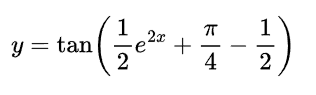